# E05 : Numerical integration of ODEs, and application to the Leaky Integrate-and-Fire neuron model -- Homework
---

Based on the tutorial, we will use simulations of the LIF to check analytical results for the f-I curve that predicts the firing rate of the LIF as a funtion of the input current.

### Let us first plot the analytical solution for the firing rate 

The time from one spike to the next must be exactly the time it takes to reach the spike threshold when starting from the reset potential: $V(T)=V_{\rm threshold}$. Using the analytical solution for $V(t)$, with $V(t=0)=V_{\rm reset}$,  allows us to calculate the firing rate $f(I)$:

$$f(I) = \frac{1}{\tau_m} \left(\log\frac{E_L+I/g_L-V_{\rm reset}}{E_L+I/g_L-V_{\rm threshold}}\right)^{-1}$$


In [19]:
# some imports for the numerics to follow, you'll be familiar with these
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

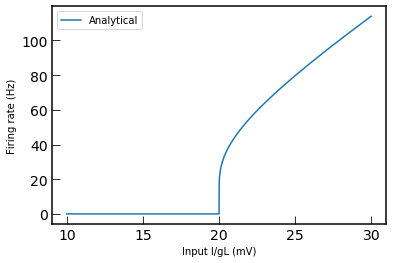

In [20]:
# define parameters
tau = 7.     # decay time constant, in ms
V0 = -70.    # initial voltage, in mV
EL = -50.    # resting potential, in mV
Vthreshold = -30. # mV
Vreset = -55.0    # mV

def fI_analytical(IgL):
    """Firing rate (in Hz) of the LIF as a function 
    of the effective input I/g_L."""
    # if the current is below a firing threshold,
    # the voltage does not reach threshold and the
    # firing rate is zero
    IgL_threshold = Vthreshold - EL
    if IgL <= IgL_threshold:
        return 0.0
    T_isi = tau * np.log((EL+IgL-Vreset)/(EL+IgL-Vthreshold))
    rate = 1000/T_isi # rate in Hz
    return rate

Ivals = np.arange(10., 30, 0.01)
rates_analytical = [fI_analytical(I) for I in Ivals]

fig, ax = plt.subplots()
ax.plot(Ivals, rates_analytical, label='Analytical')
ax.set_xlabel('Input I/gL (mV)')
ax.set_ylabel('Firing rate (Hz)')
ax.legend()

#### Homework questions:

1. Simulate the LIF for a duration of 1s, for the value of `IgL = 21.0` (use the code from the in-class tutorial from the **Simulation of a Leaky Integrate-and-Fire neuron** section). Plot the voltage dynamics. How many spikes do you count?
2. Repeat the simulation of the LIF for different values of the input, `Igl_vals = [17.5, 20.5, 21., 21.5, 22., 25.]`. Record each time the number of spikes. 
3. From the recorded spiketimes or number of spikes, calculate the firing rate for each of the above values of the input.
4. Plot your results for the firing rate obtained by simulations together with the analytical result for the firing rate (see above).

**Solution 1.** 

The code for the numerical simulation is taken from the in-class tutorial. Only the input current `IgL` and the simulation duration `T` are changed.  

In [21]:
# Your code

# We have to define a spike threshold voltage and the reset voltage!
Vthreshold = -30. # mV
Vreset = -55.0 # mV

dt = 0.01 # time step in ms
T = 1000.0 # duration in ms
t = np.arange(0,T,dt)
nt = len(t)

# We need to redefine the derivative function,
# which for the LIF depends on the input current!
def dvdt(v, IgL):
    """Derivative of the membrane potential for the 
    LIF. Note that we use IgL as a short-hand for 
    the input current I divided by the leak 
    conductance gL, which has the units of voltage."""
    return (EL+IgL-v)/tau

v = np.zeros(nt)
v[0] = Vreset

# effective input current
IgL = 21

spiketimes = []
for i in range(nt-1):
    # implement threshold condition!
    if v[i] >= Vthreshold:
        # when above threshold, we have to reset
        # the potential!
        v[i+1] = Vreset
        spiketimes.append(dt*i)
    else:
        v[i+1] = v[i] + dt*dvdt(v[i],IgL)


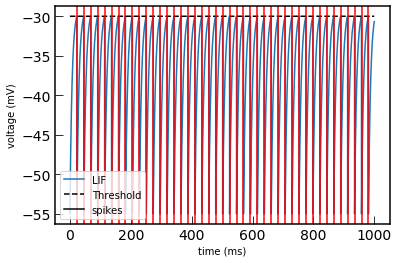

In [22]:
fig, ax = plt.subplots()
ax.plot(t, v, label='LIF')
ax.plot(t, Vthreshold*np.ones(nt), color='k', linestyle='--', label='Threshold')
for time in spiketimes:
    ax.axvline(time, color='r')
ax.plot([],[],'k',label='spikes')
ax.set_xlabel('time (ms)')
ax.set_ylabel('voltage (mV)')
ax.legend()

In [23]:
print('The LIF emits ', len(spiketimes), ' spikes during 1 s with an input IgL=',IgL,'.')

The LIF emits  43  spikes during 1 s with an input IgL= 21 .


**Solution 2.** 

The integration of the LIF is placed in a function, which takes the current as input argument. The number of spikes are returned and stored in a list. 

In [24]:
Igl_vals = [17.5, 20.5, 21., 21.5, 22., 25.]

def integrationLIF(IgL):
    v = np.zeros(nt)
    v[0] = Vreset

    spiketimes = []
    for i in range(nt-1):
        # implement threshold condition!
        if v[i] >= Vthreshold:
            # when above threshold, we have to reset
            # the potential!
            v[i+1] = Vreset
            spiketimes.append(dt*i)
        else:
            v[i+1] = v[i] + dt*dvdt(v[i],IgL)
    
    return(len(spiketimes))


numberOfSpikes = []

for i in Igl_vals:
    nSpk = integrationLIF(i)
    numberOfSpikes.append(nSpk)


Below is the list of number of spikes for each of the input currents. 

In [25]:
print(numberOfSpikes)

[0, 36, 43, 49, 54, 79]


**Solution 3.**

Input current, number of spikes during the 1 s simulation and the firing rate are all saved in one array below. Note that for a one second long recording, the number of spikes is equivalent to the firing rate. 

In [26]:
solutions = np.zeros((len(Igl_vals),3))

for i in np.arange(len(Igl_vals)):
    solutions[i,0] = Igl_vals[i]
    solutions[i,1] = numberOfSpikes[i]
    if numberOfSpikes[i] != 0:
        solutions[i,2] = numberOfSpikes[i]/1. # firing rate is : number of spikes / time in seconds

**Solution 4.**


(0, 30)

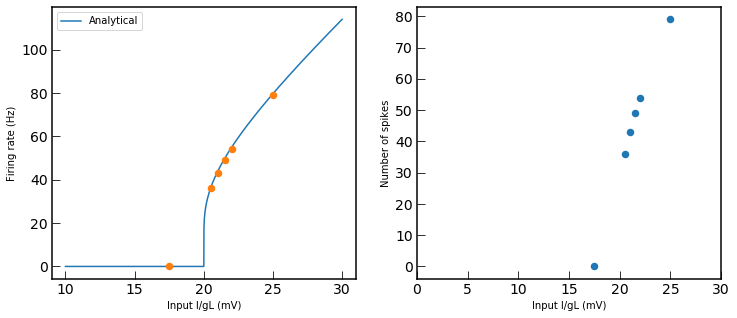

In [27]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax1.plot(Ivals, rates_analytical, label='Analytical')
ax1.plot(solutions[:,0],solutions[:,2],'o')
ax1.set_xlabel('Input I/gL (mV)')
ax1.set_ylabel('Firing rate (Hz)')
ax1.legend()

ax1 = fig.add_subplot(122)
ax1.plot(solutions[:,0],solutions[:,1],'o')
ax1.set_xlabel('Input I/gL (mV)')
ax1.set_ylabel('Number of spikes')
ax1.set_xlim(0,30)

The plot of the firing rate vs input shows a good match - as expected and as it should be if calculation and simulation are correct - between the analytical solution and the results from the simulation. 

## The end